In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("TV_Final.csv")

In [3]:
train

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


In [4]:
train.describe(
)

,Size,Selling Price,Original Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [5]:
train["O-S Price"]  = train["Original Price"]- train["Selling Price"]

In [6]:
train.columns
cols=['Brand', 'Resolution',"Operating System", 'Rating','Size ', 'Selling Price', 'Original Price','O-S Price']
train=train[cols]

In [7]:
train

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,Ultra HD LED,VIDAA,4.3,55,37999,54990,16991
1,TCL,QLED Ultra HD,Android,4.4,55,52999,129990,76991
2,realme,HD LED,Android,4.3,32,13999,17999,4000
3,Mi,HD LED,Android,4.4,32,14999,19999,5000
4,realme,HD LED,Android,4.3,32,12999,21999,9000
...,...,...,...,...,...,...,...,...
907,SONY,Full HD LED,Linux,4.4,43,44999,57900,12901
908,SONY,Full HD LED,Linux,4.6,40,41499,51900,10401
909,SONY,Ultra HD LED,Linux,4.3,65,149990,184990,35000
910,SONY,HD LED,Linux,4.4,32,32900,32900,0


### Visualizing The Data

<AxesSubplot:>

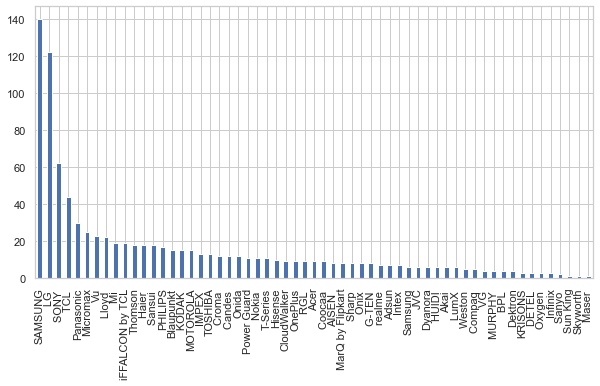

In [8]:
sns.set_style("whitegrid")
train["Brand"].value_counts().plot(kind="bar", figsize=(10,5))

as we can see Samsung, LG, Sony, TCL, Panasonic are top most sold televison

In [9]:
train["Brand"].value_counts().nlargest(40)

SAMSUNG             140
LG                  122
SONY                 62
TCL                  44
Panasonic            30
Micromax             25
Vu                   23
Lloyd                22
Mi                   19
iFFALCON by TCL      19
Thomson              18
Haier                18
Sansui               18
PHILIPS              17
Blaupunkt            15
KODAK                15
MOTOROLA             15
IMPEX                13
TOSHIBA              13
Croma                12
Candes               12
Onida                12
Power Guard          11
Nokia                11
T-Series             11
Hisense              10
CloudWalker           9
OnePlus               9
RGL                   9
Acer                  9
Coocaa                9
AISEN                 8
MarQ by Flipkart      8
Sharp                 8
Onix                  8
G-TEN                 8
realme                7
Adsun                 7
Intex                 7
Samsung               6
Name: Brand, dtype: int64

<AxesSubplot:ylabel='Resolution'>

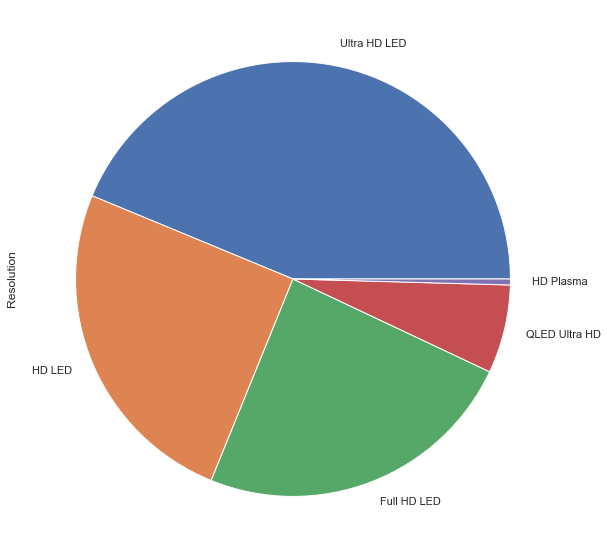

In [10]:
sns.set_style("whitegrid")
train["Resolution"].value_counts().plot(kind="pie", figsize=(20,10))

In [11]:
train["Resolution"].value_counts()

Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Resolution, dtype: int64

<AxesSubplot:>

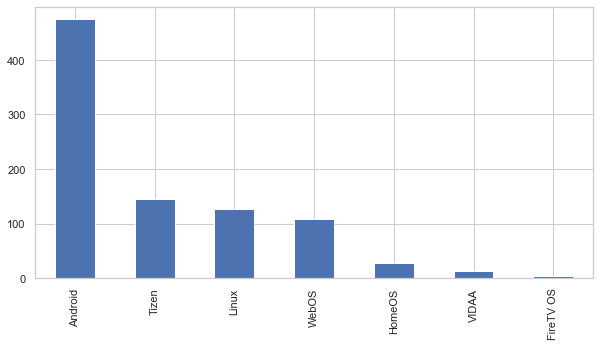

In [12]:
train["Operating System"].value_counts().nlargest(10).plot(kind="bar", figsize=(10,5))

In [13]:
train["Operating System"].value_counts()

Android      474
Tizen        145
Linux        127
WebOS        109
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

### Outliers

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


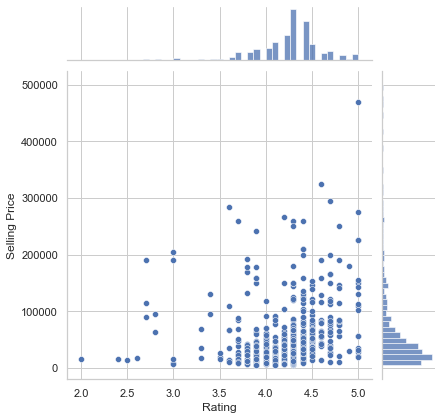

In [14]:
sns.jointplot(train.Rating, train["Selling Price"])

In [15]:
train = train.drop(train[(train["Rating"]<2.3) & (train["Selling Price"]>400000)].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

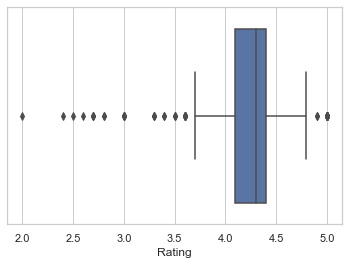

In [16]:
sns.boxplot(train["Rating"])

In [17]:
train["Rating"].value_counts()

4.3    156
4.4    121
4.2     77
4.1     55
4.5     48
4.0     38
3.9     35
4.7     27
3.8     25
3.7     23
4.6     20
5.0     18
4.8     16
3.6      9
3.0      5
3.3      3
3.5      3
2.7      3
4.9      2
3.4      2
2.8      2
2.4      1
2.0      1
2.5      1
2.6      1
Name: Rating, dtype: int64

i will be droping raiting below 2, they stand like outliers, since machine barely make decision on insufficient data, so we can assume that costumers rarely request for product with low rating, but i will suggest that most cases, it shouldnt be treated

In [18]:
train = train.drop(train[train["Rating"]<2.6].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

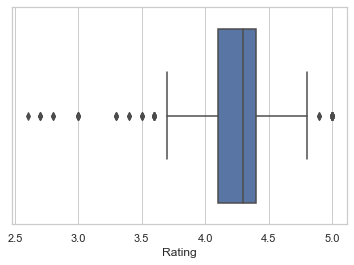

In [19]:
sns.boxplot(train["Rating"])

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling Price'>

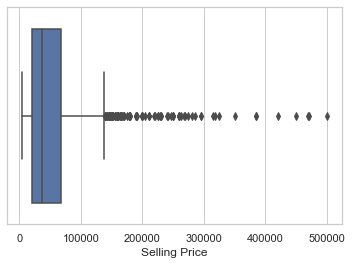

In [20]:
sns.boxplot(train["Selling Price"])

In [21]:
train = train.drop(train[train["Selling Price"]>400000].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling Price'>

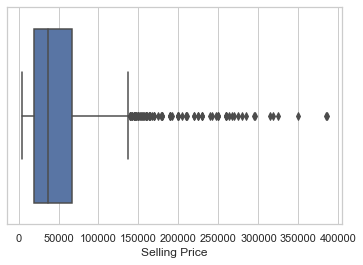

In [22]:
sns.boxplot(train["Selling Price"])

In [23]:
train = train.drop(train[train["Original Price"]>400000].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Original Price'>

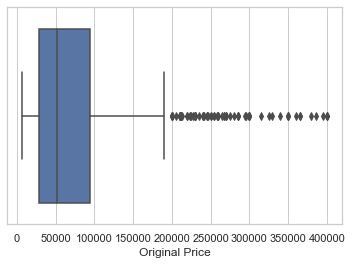

In [24]:
sns.boxplot(train["Original Price"])

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size '>

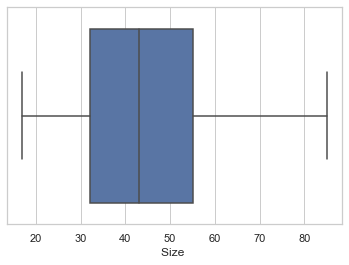

In [25]:
sns.boxplot(train["Size "])

### Missing Data

In [210]:
df = train.copy()

In [211]:
train.isna().sum().sort_values(ascending=False)

Rating              213
Operating System     11
Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
O-S Price             0
dtype: int64

In [212]:
from sklearn.impute import SimpleImputer

In [213]:
mis_cols=df["Rating"].mean()
df["Rating"].fillna(mis_cols, inplace=True)

In [214]:
df[180:200]

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
180,LG,Ultra HD LED,WebOS,4.800000,55,76197,129990,53793
181,realme,Full HD LED,Android,4.200000,32,17999,23999,6000
182,Micromax,Full HD LED,Android,3.900000,43,22999,26990,3991
183,SAMSUNG,QLED Ultra HD,Tizen,4.400000,55,159500,244900,85400
184,Micromax,Full HD LED,Android,4.300000,43,23990,33000,9010
185,LG,Ultra HD LED,WebOS,4.500000,43,47499,75343,27844
186,LG,Ultra HD LED,WebOS,4.241314,43,46969,64990,18021
187,TCL,Full HD LED,Android,4.300000,75,144790,259990,115200
188,LG,HD LED,WebOS,4.300000,32,22200,25999,3799
189,Candes,HD LED,Android,4.100000,24,9999,17990,7991


In [215]:
df["Operating System"].value_counts()

Android      469
Tizen        142
Linux        124
WebOS        106
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

i have taking time to go through the 11 missing value on Operating system, the major of them is an android 

In [216]:
df["Operating System"].fillna("Android", inplace=True)

In [217]:
df.isna().sum()

Brand               0
Resolution          0
Operating System    0
Rating              0
Size                0
Selling Price       0
Original Price      0
O-S Price           0
dtype: int64

 we have completely clear the missing values

### Lebel the data, since ML Understand value

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,Ultra HD LED,VIDAA,4.300000,55,37999,54990,16991
1,TCL,QLED Ultra HD,Android,4.400000,55,52999,129990,76991
2,realme,HD LED,Android,4.300000,32,13999,17999,4000
3,Mi,HD LED,Android,4.400000,32,14999,19999,5000
4,realme,HD LED,Android,4.300000,32,12999,21999,9000
5,OnePlus,HD LED,Android,4.300000,32,15999,19999,4000
6,OnePlus,Full HD LED,Android,4.300000,43,25999,29999,4000
7,TCL,Ultra HD LED,Android,4.200000,65,57999,119990,61991
8,Mi,Full HD LED,Android,4.300000,40,21999,29999,8000
9,realme,Ultra HD LED,Android,4.300000,43,26999,32999,6000


In [220]:
ibe= LabelEncoder()
cols= ("Operating System", "Resolution", "Brand")
for i in cols:
    df[i] = ibe.fit_transform(list(df[i].values))

In [221]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,52,4,5,4.300000,55,37999,54990,16991
1,51,3,0,4.400000,55,52999,129990,76991
2,58,1,0,4.300000,32,13999,17999,4000
3,31,1,0,4.400000,32,14999,19999,5000
4,58,1,0,4.300000,32,12999,21999,9000
5,34,1,0,4.300000,32,15999,19999,4000
6,34,0,0,4.300000,43,25999,29999,4000
7,51,4,0,4.200000,65,57999,119990,61991
8,31,0,0,4.300000,40,21999,29999,8000
9,58,4,0,4.300000,43,26999,32999,6000


In [222]:
corrmat=df.corr()

In [223]:
corrmat["Selling Price"].sort_values(ascending=False)

Selling Price       1.000000
Original Price      0.931340
Size                0.674223
Operating System    0.433770
O-S Price           0.429307
Resolution          0.344897
Brand               0.158514
Rating              0.122372
Name: Selling Price, dtype: float64

cols = df.columns
sns.pairplot(df[(cols)])

In [224]:
df["Selling Price"] = np.log1p(df["Selling Price"])

In [225]:
df["Original Price"] = np.log1p(df["Original Price"])

In [226]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,52,4,5,4.300000,55,10.545341,10.914925,16991
1,51,3,0,4.400000,55,10.878047,11.775220,76991
2,58,1,0,4.300000,32,9.546813,9.798127,4000
3,31,1,0,4.400000,32,9.615805,9.903488,5000
4,58,1,0,4.300000,32,9.472705,9.998798,9000
5,34,1,0,4.300000,32,9.680344,9.903488,4000
6,34,0,0,4.300000,43,10.165852,10.308953,4000
7,51,4,0,4.200000,65,10.968198,11.695172,61991
8,31,0,0,4.300000,40,9.998798,10.308953,8000
9,58,4,0,4.300000,43,10.203592,10.404263,6000


In [227]:
from scipy.stats import skew
numeric= df.dtypes[df.dtypes != "object"].index
skewed_var = df[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({"Skewed Feautures" : skewed_var})
skewness

,Skewed Feautures
O-S Price,2.701722
Operating System,0.605622
Original Price,0.195060
Selling Price,0.151473
Size,0.044730
Resolution,-0.086588
Brand,-0.384554
Rating,-1.269118


In [228]:
from scipy.special import boxcox1p
skewness= skewness[abs(skewness) > 0.75]
skew_var2 = skewness.index
for i in skew_var2 :
    df[i] = boxcox1p(df[i], 0.15)
    df[i] +=1

In [229]:
df.columns

Index(['Brand', 'Resolution', 'Operating System', 'Rating', 'Size ',
       'Selling Price', 'Original Price', 'O-S Price'],
      dtype='object')

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
x= df[['Resolution', 'Operating System', 'Rating', 'Size ']]
x1= sm.add_constant(x)
vif = pd.DataFrame()
vif["VIF"] =[variance_inflation_factor(x1.values, 1) for i in range (x1.shape[1])]
vif["features"]= x1.columns

In [231]:
vif

,VIF,features
0,1.385846,const
1,1.385846,Resolution
2,1.385846,Operating System
3,1.385846,Rating
4,1.385846,Size


this is vif since its below 5

In [232]:
target=df["Selling Price"]

In [233]:
inputs= df.drop(["Selling Price", "Original Price", "O-S Price"], axis=1)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, random_state=42, test_size=0.2)

In [236]:
scaller.shape

(898, 64)

In [237]:
target.shape

(898,)

In [238]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [239]:
y_hat = lin_reg.predict(x_train)

In [240]:
lin_reg.intercept_

2.6069868772866025

In [241]:
inputs.columns

Index(['Brand', 'Resolution', 'Operating System', 'Rating', 'Size '], dtype='object')

In [242]:
lin_reg.coef_

array([ 0.00600001, -0.00067279,  0.02957135,  0.05176206,  0.18027003])

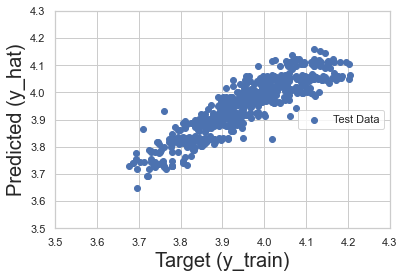

In [243]:
plt.scatter(y_train, y_hat, label="Test Data")

plt.xlabel("Target (y_train)", size=20)


plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)
plt.legend(loc=5)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

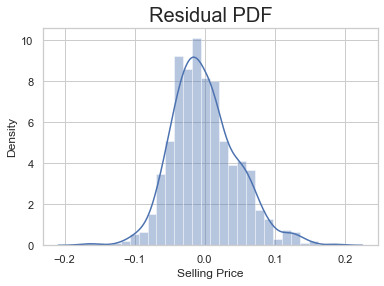

In [244]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size=20)

In [245]:
lin_reg.score(x_train,y_train)

0.8155492597534916

In [246]:
### Manually Check Accuracy

In [247]:
model_output =lin_reg.predict(x_train).round()
model_output

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [248]:
y_train.round(2)

880    3.98
740    3.92
231    3.86
388    3.82
118    3.95
420    4.08
314    4.06
29     3.97
55     3.87
630    3.90
597    3.99
737    3.84
365    3.78
81     3.96
260    4.00
447    3.88
558    3.72
526    4.05
785    3.86
544    3.95
875    3.75
891    3.88
537    3.93
355    4.12
766    4.09
693    4.13
716    3.83
589    3.97
497    4.00
311    3.86
528    3.84
827    3.87
774    3.99
853    4.09
290    4.01
7      4.01
691    4.07
155    4.03
487    3.94
426    3.84
101    3.76
199    4.01
851    3.96
346    3.93
299    3.91
377    3.95
357    3.84
723    3.89
306    4.09
464    3.85
2      3.83
250    4.19
846    3.69
551    3.84
328    4.10
158    4.02
519    3.96
834    4.00
667    4.13
712    4.03
606    3.86
621    3.80
433    3.86
527    3.95
405    3.93
485    3.98
417    4.11
887    4.05
657    3.83
212    4.16
451    3.86
79     3.88
148    4.00
429    4.08
60     3.98
396    3.84
394    3.90
445    4.08
816    3.74
266    4.02
133    3.97
465    4.01
567    3.79
709 

In [249]:
model_output == y_train.round()

880    True
740    True
231    True
388    True
118    True
420    True
314    True
29     True
55     True
630    True
597    True
737    True
365    True
81     True
260    True
447    True
558    True
526    True
785    True
544    True
875    True
891    True
537    True
355    True
766    True
693    True
716    True
589    True
497    True
311    True
528    True
827    True
774    True
853    True
290    True
7      True
691    True
155    True
487    True
426    True
101    True
199    True
851    True
346    True
299    True
377    True
357    True
723    True
306    True
464    True
2      True
250    True
846    True
551    True
328    True
158    True
519    True
834    True
667    True
712    True
606    True
621    True
433    True
527    True
405    True
485    True
417    True
887    True
657    True
212    True
451    True
79     True
148    True
429    True
60     True
396    True
394    True
445    True
816    True
266    True
133    True
465    True
567    True
709 

In [250]:
np.sum(model_output == y_train.round())

718

In [251]:
model_output.shape

(718,)

In [252]:
np.sum(model_output == y_train.round()) / model_output.shape[0]

1.0

In [253]:
x_train.shape, y_train.shape

((718, 5), (718,))

from sklearn.metrics import mean_squared_error
y_predict= lin_reg.predict(x_train)
error = mean_squared_error(x_train, y_predict.T)
s_error= np.sqrt(error)
s_error

the R- square is good but not better, let's see if we can improve it

In [254]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [255]:
tree_reg.score(x_train, y_train)

0.9815217583408817

In [256]:
y_hat2 = tree_reg.predict(x_train)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

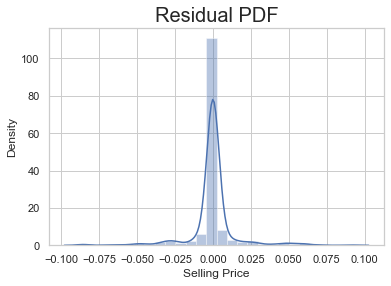

In [257]:
sns.distplot(y_train - y_hat2)
plt.title("Residual PDF", size=20)

In [258]:
y_hat= lin_reg.predict(x_train)

(3.5, 4.3)

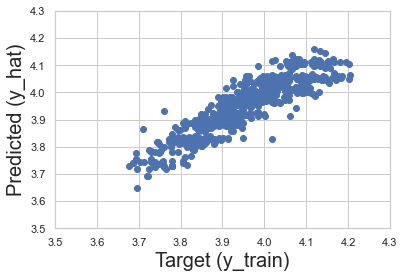

In [259]:
plt.scatter(y_train, y_hat)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

(3.5, 4.3)

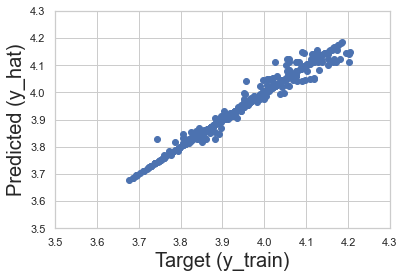

In [260]:
plt.scatter(y_train, y_hat2)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
score1 = cross_val_score(tree_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [263]:
tree_cvs =np.sqrt(-score1)

In [264]:
tree_cvs

array([0.04621506, 0.05319319, 0.04988596, 0.05711938, 0.05302573,
       0.04453009, 0.05611049, 0.04547266, 0.040962  , 0.04355663])

In [265]:
np.mean(tree_cvs), np.std(tree_cvs)

(0.04900711935265132, 0.005342984790129107)

In [266]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_cvs)


Scores: [0.04621506 0.05319319 0.04988596 0.05711938 0.05302573 0.04453009
 0.05611049 0.04547266 0.040962   0.04355663]
Mean: 0.04900711935265132
Standard deviation: 0.005342984790129107


In [267]:
b= [0.04413217, 0.04228039, 0.04089118, 0.04611245, 0.05118645, 0.05283442,
 0.04816304, 0.05172952, 0.04218179, 0.04362818]

In [268]:
score2 = cross_val_score(lin_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
lin_cvs =np.sqrt(-score2)
lin_cvs
d=[0.03765696, 0.01356296, 0.01361114, 0.01366524, 0.01383534,
       0.01337146, 0.01348806, 0.01337857, 0.0133967 , 0.01393744]

In [269]:
np.mean(lin_cvs), np.std(lin_cvs)

(0.04700605828637239, 0.005075256865651695)

### Validation curve

In [270]:
from sklearn.model_selection import validation_curve

In [271]:
np.mean(x_train)

C:\Users\DVICEPP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Brand               5.380334
Resolution          2.089653
Operating System    1.847796
Rating              2.878882
Size                6.139779
dtype: float64

x_train, y_train = validation_curve(tree_reg, x_train,y_train, param_name="max_depth", param_range=range(1,len(x_train)), cv=10)
plt.plot(tree_reg, np.mean(x_train, 1), color="blue")
plt.plot(tree_reg, np.mean(tree_cvs, 1), color="red")

In [272]:
from sklearn.ensemble import RandomForestRegressor

In [273]:
forest_reg= RandomForestRegressor()
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [274]:
score3 = cross_val_score(forest_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
forest_cvs =np.sqrt(-score3)
forest_cvs
c=[0.03460192, 0.03093604, 0.02822074, 0.03304305, 0.03708905,
       0.03341002, 0.03300783, 0.03236916, 0.03333704, 0.03080104]

In [275]:
np.mean(forest_cvs)

0.04022197000015264

In [276]:
np.std(forest_cvs)

0.003673376054195691

In [277]:
from sklearn.linear_model import SGDRegressor

In [278]:
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)

SGDRegressor()

In [279]:
sgd_reg.score(x_train,y_train)

-0.17349496756335303

In [280]:
lin_reg.score(x_train,y_train)

0.8155492597534916

In [281]:
score4 = cross_val_score(sgd_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
sgd_cvs =np.sqrt(-score4)
sgd_cvs

array([0.12439344, 0.11806092, 0.1137393 , 0.129176  , 0.11063052,
       0.11973467, 0.12467431, 0.11913001, 0.13643156, 0.13001509])

In [282]:
a= [0.03986527, 0.03617853, 0.03768528, 0.04504103, 0.04998168,
       0.04718049, 0.04252464, 0.04116121, 0.04002029, 0.04091109]
np.mean(a)

0.04205495099999999

In [283]:
summ = pd.DataFrame([["Linear", np.mean(d), np.std(d)], 
                     ["SGD_Reg", np.mean(a), np.std(a)], 
                     ["Forest_Reg", np.mean(c), np.std(c)], 
                     ["Tree_Reg", np.mean(b), np.std(b)]], 
                    columns=[["Model", "Mean_Square_Error","Standard Deviation"], ])

In [284]:
summ

,Model,Mean_Square_Error,Standard Deviation
0,Linear,0.015990,0.007224
1,SGD_Reg,0.042055,0.004036
2,Forest_Reg,0.032682,0.002256
3,Tree_Reg,0.046314,0.004169


As we can see, Linear Regression is the best model to use for This regression, as others may cost overfitting on our model, since it has the lowest cross_val_score mean...meaning the mean_squared_error will also be low, for we can begin  to fine tune our algorithm

In [285]:
yhat3 = forest_reg.predict(x_train)

In [286]:
yhat4= sgd_reg.predict(x_train)

Text(0.5, 1.0, 'TreeRegressor')

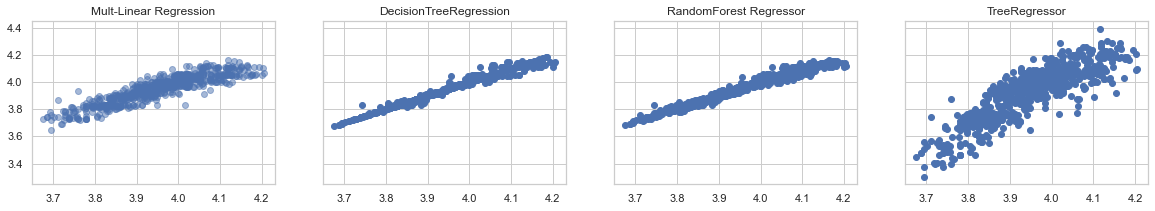

In [287]:
f, (x1, x2, x3, x4) = plt.subplots(1, 4, sharey= True, figsize=(20,3))
x1.scatter(y_train, y_hat, alpha= 0.5)
x1.set_title("Mult-Linear Regression")

x2.scatter(y_train, y_hat2)
x2.set_title("DecisionTreeRegression")

x3.scatter(y_train, yhat3)
x3.set_title("RandomForest Regressor")

x4.scatter(y_train, yhat4)
x4.set_title("TreeRegressor")

In [288]:
lin_regsum= pd.DataFrame(inputs.columns.values, columns=["Features"])
lin_regsum["Weights"] = lin_reg.coef_
lin_regsum.sort_values(by=["Weights"], ascending=False).head(50)

,Features,Weights
4,Size,0.180270
3,Rating,0.051762
2,Operating System,0.029571
0,Brand,0.006000
1,Resolution,-0.000673


In [289]:
train["Brand"].unique()

array(['TOSHIBA', 'TCL ', 'realme ', 'Mi ', 'OnePlus', 'Hisense', 'LG ',
       'MarQ by Flipkart', 'iFFALCON by TCL', 'Coocaa ', 'SAMSUNG',
       'Infinix', 'Vu', 'Nokia ', 'Thomson', 'SONY ', 'KODAK ',
       'MOTOROLA', 'PHILIPS', 'Acer', 'Blaupunkt', 'Adsun', 'T-Series',
       'Panasonic', 'Micromax', 'Sansui ', 'Croma ', 'Candes ', 'Dyanora',
       'Haier ', 'Onida', 'RGL ', 'Lloyd ', 'LumX ', 'Onix ', 'IMPEX ',
       'BPL ', 'CloudWalker', 'Oxygen ', 'Power Guard', 'Akai ', 'VG ',
       'Sun King', 'Compaq ', 'HUIDI ', 'Intex ', 'DETEL ', 'JVC',
       'G-TEN ', 'Skyworth', 'Maser ', 'Sanyo ', 'MURPHY ', 'Samsung',
       'Dektron', 'Sharp ', 'KRISONS', 'Weston ', 'AISEN  '], dtype=object)

## Testing our Model

In [290]:
y_hat_test = lin_reg.predict(x_test)

(3.5, 4.3)

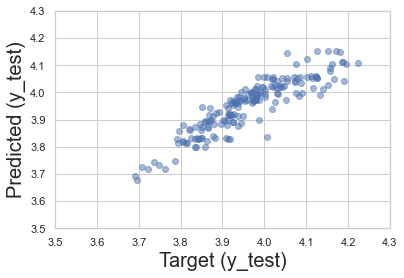

In [291]:
plt.scatter(y_test, y_hat_test, alpha=0.5)

plt.xlabel("Target (y_test)", size=20)

plt.ylabel("Predicted (y_test)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

In [292]:
df_pf = pd.DataFrame(np.exp(y_hat_test)*1000, columns=["Prediction"])
df_pf.head()

,Prediction
0,54653.238571
1,49328.358063
2,55534.154901
3,47356.853696
4,53012.383037


In [293]:
y_test = y_test.reset_index(drop=True)
df_pf["Target"] = np.exp(y_test)*1000

In [294]:
df_pf

,Prediction,Target
0,54653.238571,54021.136261
1,49328.358063,49514.299173
2,55534.154901,56267.860307
3,47356.853696,44543.456729
4,53012.383037,51300.578648
5,53179.788996,53440.775135
6,60678.270970,64197.546321
7,53114.699425,53325.388966
8,57861.237653,61766.066353
9,55748.735846,56642.555283


In [295]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]

In [296]:
df_pf["Different%"] =np.abs( df_pf["Residual"]/df_pf["Target"]*100)

In [297]:
df_pf

,Prediction,Target,Residual,Different%
0,54653.238571,54021.136261,-632.102310,1.170102
1,49328.358063,49514.299173,185.941110,0.375530
2,55534.154901,56267.860307,733.705406,1.303951
3,47356.853696,44543.456729,-2813.396968,6.316072
4,53012.383037,51300.578648,-1711.804388,3.336813
5,53179.788996,53440.775135,260.986139,0.488365
6,60678.270970,64197.546321,3519.275351,5.481947
7,53114.699425,53325.388966,210.689541,0.395102
8,57861.237653,61766.066353,3904.828701,6.321964
9,55748.735846,56642.555283,893.819437,1.578000


In [298]:
df_pf.describe()

,Prediction,Target,Residual,Different%
count,180.000000,180.000000,180.000000,180.000000
mean,52362.182617,52888.286956,526.104339,3.568003
std,5080.427514,5965.820555,2638.502511,3.045472
min,39527.213154,40083.190500,-5620.935211,0.007813
25%,48728.448329,48358.999061,-1466.990654,1.228755
50%,53006.478071,52250.089590,76.892749,2.924064
75%,55761.020336,56315.315548,1699.614089,5.122527
max,63661.727516,68241.584470,9109.917132,15.450860


In [299]:
pd.options.display.max_rows= 999
df_pf.round(4).sort_values(by=["Different%"])

,Prediction,Target,Residual,Different%
58,63508.1179,63503.1561,-4.9618,0.0078
161,57647.1583,57669.0250,21.8667,0.0379
178,50215.0615,50240.3279,25.2664,0.0503
128,50263.5349,50238.2623,-25.2726,0.0503
105,55726.6925,55769.7720,43.0795,0.0772
171,40131.7330,40083.1905,-48.5425,0.1211
168,56004.3636,56072.8133,68.4497,0.1221
151,53220.1748,53141.6445,-78.5303,0.1478
107,45334.6901,45265.4503,-69.2398,0.1530
172,45319.7418,45405.0776,85.3358,0.1879


In [300]:
sorted(train["Brand"].unique())

['AISEN  ',
 'Acer',
 'Adsun',
 'Akai ',
 'BPL ',
 'Blaupunkt',
 'Candes ',
 'CloudWalker',
 'Compaq ',
 'Coocaa ',
 'Croma ',
 'DETEL ',
 'Dektron',
 'Dyanora',
 'G-TEN ',
 'HUIDI ',
 'Haier ',
 'Hisense',
 'IMPEX ',
 'Infinix',
 'Intex ',
 'JVC',
 'KODAK ',
 'KRISONS',
 'LG ',
 'Lloyd ',
 'LumX ',
 'MOTOROLA',
 'MURPHY ',
 'MarQ by Flipkart',
 'Maser ',
 'Mi ',
 'Micromax',
 'Nokia ',
 'OnePlus',
 'Onida',
 'Onix ',
 'Oxygen ',
 'PHILIPS',
 'Panasonic',
 'Power Guard',
 'RGL ',
 'SAMSUNG',
 'SONY ',
 'Samsung',
 'Sansui ',
 'Sanyo ',
 'Sharp ',
 'Skyworth',
 'Sun King',
 'T-Series',
 'TCL ',
 'TOSHIBA',
 'Thomson',
 'VG ',
 'Vu',
 'Weston ',
 'iFFALCON by TCL',
 'realme ']

In [301]:
inputs.columns

Index(['Brand', 'Resolution', 'Operating System', 'Rating', 'Size '], dtype='object')

In [302]:
sorted(train["Resolution"].unique())

['Full HD LED', 'HD LED', 'HD Plasma', 'QLED Ultra HD', 'Ultra HD LED']

In [303]:
train["Size "].value_counts()

32    171
55    170
43    161
65     95
50     74
49     59
40     44
24     40
39     16
75     10
42     10
22      6
48      6
20      5
60      5
46      5
58      5
70      3
21      2
52      2
47      2
19      2
28      1
31      1
85      1
38      1
17      1
Name: Size , dtype: int64

In [304]:
train['Operating System'].unique()

array(['VIDAA', 'Android', 'Linux', nan, 'Tizen', 'WebOS', 'HomeOS',
       'FireTV OS'], dtype=object)

In [305]:
inputs.columns

Index(['Brand', 'Resolution', 'Operating System', 'Rating', 'Size '], dtype='object')

In [317]:
input_data= [2,2,1,4.5,28]

#changing input data to numpy
input_data = np.array(input_data)

#reshapping input data
input_data = input_data.reshape(-1,1)

Prediction = lin_reg.predict(input_data.transform(input_data))

AttributeError: 'list' object has no attribute 'transform'